In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from datetime import datetime
from tsgen import TsGenerator
from outsourcing import GDALBridge
import tif_explorer

In [2]:
# Turning the compatibility match into a function

def dfcompat(df1, df2, colname):
    """
    Compare two pd.DataFrames given a common column in both of them,
    then, return two new DFs containing only the rows where they mach in
    the given column and the set used to match them.
    """
    set_df1 = set(df1[colname])
    set_df2 = set(df2[colname])
    matches = set_df1.intersection(set_df2)
    
    df1_match = df1[df1[colname].isin(matches)]
    df2_match = df2[df2[colname].isin(matches)]
    
    return df1_match, df2_match, matches

In [3]:
# loading the iCOR and WFR DataFrames so they can be sorted by date

df_coari_icor_m = pd.read_csv("D:\\processing\\win\\coari_icor_ts_match.csv", parse_dates=['Datetime'])
df_fonte_boa_icor_m = pd.read_csv("D:\\processing\\win\\fonte_boa_icor_ts_match.csv", parse_dates=['Datetime'])
df_madeira_icor_m = pd.read_csv("D:\\processing\\win\\madeira_icor_ts_match.csv", parse_dates=['Datetime'])
df_manaca_icor_m = pd.read_csv("D:\\processing\\win\\manacapuru_icor_ts_match.csv", parse_dates=['Datetime'])
df_negro_icor_m = pd.read_csv("D:\\processing\\win\\negro_icor_ts_match.csv", parse_dates=['Datetime'])
df_tefe_icor_m = pd.read_csv("D:\\processing\\win\\tefe_icor_ts_match.csv", parse_dates=['Datetime'])

df_coari_wfr_m = pd.read_csv("D:\\processing\\win\\coari_wfr_ts_match.csv", parse_dates=['Datetime'])
df_fonte_boa_wfr_m = pd.read_csv("D:\\processing\\win\\fonte_boa_wfr_ts_match.csv", parse_dates=['Datetime'])
df_madeira_wfr_m = pd.read_csv("D:\\processing\\win\\madeira_wfr_ts_match.csv", parse_dates=['Datetime'])
df_manaca_wfr_m = pd.read_csv("D:\\processing\\win\\manacapuru_wfr_ts_match.csv", parse_dates=['Datetime'])
df_negro_wfr_m = pd.read_csv("D:\\processing\\win\\negro_wfr_ts_match.csv", parse_dates=['Datetime'])
df_tefe_wfr_m = pd.read_csv("D:\\processing\\win\\tefe_wfr_ts_match.csv", parse_dates=['Datetime'])

In [5]:
# Calling match function to campatibilize the data

df_coari_wfr_m2, df_coari_icor_m2, coari_m = dfcompat(df_coari_wfr_m, df_coari_icor_m, 'Date-String')
df_fonte_boa_wfr_m2, df_fonte_boa_icor_m2, fonte_boa_m  = dfcompat(df_fonte_boa_wfr_m,df_fonte_boa_icor_m, 'Date-String')
df_madeira_wfr_m2, df_madeira_icor_m2, madeira_m = dfcompat(df_madeira_wfr_m,df_madeira_icor_m, 'Date-String')
df_manaca_wfr_m2, df_manaca_icor_m2, manaca_m = dfcompat(df_manaca_wfr_m,df_manaca_icor_m, 'Date-String')
df_negro_wfr_m2, df_negro_icor_m2, negro_m = dfcompat(df_negro_wfr_m,df_negro_icor_m, 'Date-String')
df_tefe_wfr_m2, df_tefe_icor_m2, tefe_m = dfcompat(df_tefe_wfr_m,df_tefe_icor_m, 'Date-String')

In [ ]:
# plt.scatter(df_coari_wfr_match['B8-665'],df_coari_icor_match['B8-665'])
# plt.plot( [0,1],[0,1],'k-' )

# plt.rcParams['figure.figsize'] = [4, 4]
fig = plt.figure()
ax = plt.axes()
ax.set_title('B17:865nm 2019/03:2019/09 - TEFE')

# ax.scatter(df_coari_wfr_m2['B17-865'],df_coari_icor_m2['B17-865'])
# ax.scatter(df_fonte_boa_wfr_m2['B8-665'],df_fonte_boa_icor_m2['B8-665'])
# ax.scatter(df_madeira_wfr_m2['B8-665'],df_madeira_icor_m2['B8-665'])
# ax.scatter(df_manaca_wfr_m2['B8-665'],df_manaca_icor_m2['B8-665'])
# ax.scatter(df_negro_wfr_m2['B8-665'],df_negro_icor_m2['B8-665'])
ax.scatter(df_tefe_wfr_m2['B8-665'],df_tefe_icor_m2['B8-665'])

ax.plot( [0,1],[0,1],'k-' )
# ax.set_xlabel('WFR')
# ax.set_ylabel('iCOR')
ax.set_xlim(0,0.2)
ax.set_ylim(0,0.2)
plt.text(0.132,0.006,'% Reflectance')
# plt.text(0.67,0.006,'% Reflectance')
plt.savefig('D:\\processing\\win\\a1_plots\\tefe-icor-vs-wfr-sktr-b17.png', dpi=300)
plt.show()

# For further plotting it with annotations on each point:
# https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

In [26]:
def mass_scatter_s3(x, y, title=None, save_file=None):

    fig, axs = plt.subplots(4, 4)
    if title:
        fig.suptitle(title, fontsize=16)
    
    axs[0, 0].scatter(x['B1-400'], y['B1-400'])
    axs[0, 0].set_title('B1:400 nm')
    axs[0, 0].plot( [0,1],[0,1],'k-' )
    axs[0, 0].set_xlim(0,0.2)
    axs[0, 0].set_ylim(0,0.2)

    axs[0, 1].scatter(x['B2-412.5'], y['B2-412.5'])
    axs[0, 1].set_title('B2:412.5 nm')
    axs[0, 1].plot( [0,1],[0,1],'k-' )
    axs[0, 1].set_xlim(0,0.2)
    axs[0, 1].set_ylim(0,0.2)

    axs[0, 2].scatter(x['B3-442.5'], y['B3-442.5'])
    axs[0, 2].set_title('B3:442.5 nm')
    axs[0, 2].plot( [0,1],[0,1],'k-' )
    axs[0, 2].set_xlim(0,0.2)
    axs[0, 2].set_ylim(0,0.2)

    axs[0, 3].scatter(x['B4-490'], y['B4-490'])
    axs[0, 3].set_title('B4:490 nm')
    axs[0, 3].plot( [0,1],[0,1],'k-' )
    axs[0, 3].set_xlim(0,0.2)
    axs[0, 3].set_ylim(0,0.2)

    axs[1, 0].scatter(x['B5-510'], y['B5-510'])
    axs[1, 0].set_title('B5:510 nm')
    axs[1, 0].plot( [0,1],[0,1],'k-' )
    axs[1, 0].set_xlim(0,0.2)
    axs[1, 0].set_ylim(0,0.2)

    axs[1, 1].scatter(x['B6-560'], y['B6-560'])
    axs[1, 1].set_title('B6:560 nm')
    axs[1, 1].plot( [0,1],[0,1],'k-' )
    axs[1, 1].set_xlim(0,0.2)
    axs[1, 1].set_ylim(0,0.2)

    axs[1, 2].scatter(x['B7-620'], y['B7-620'])
    axs[1, 2].set_title('B7:620 nm')
    axs[1, 2].plot( [0,1],[0,1],'k-' )
    axs[1, 2].set_xlim(0,0.2)
    axs[1, 2].set_ylim(0,0.2)

    axs[1, 3].scatter(x['B8-665'], y['B8-665'])
    axs[1, 3].set_title('B8:665 nm')
    axs[1, 3].plot( [0,1],[0,1],'k-' )
    axs[1, 3].set_xlim(0,0.2)
    axs[1, 3].set_ylim(0,0.2)

    axs[2, 0].scatter(x['B9-673.75'], y['B9-673.75'])
    axs[2, 0].set_title('B9:673.75 nm')
    axs[2, 0].plot( [0,1],[0,1],'k-' )
    axs[2, 0].set_xlim(0,0.2)
    axs[2, 0].set_ylim(0,0.2)

    axs[2, 1].scatter(x['B10-681.25'], y['B10-681.25'])
    axs[2, 1].set_title('B10:681.25 nm')
    axs[2, 1].plot( [0,1],[0,1],'k-' )
    axs[2, 1].set_xlim(0,0.2)
    axs[2, 1].set_ylim(0,0.2)

    axs[2, 2].scatter(x['B11-708.75'], y['B11-708.75'])
    axs[2, 2].set_title('B11:708.75 nm')
    axs[2, 2].plot( [0,1],[0,1],'k-' )
    axs[2, 2].set_xlim(0,0.2)
    axs[2, 2].set_ylim(0,0.2)

    axs[2, 3].scatter(x['B12-753.75'], y['B12-753.75'])
    axs[2, 3].set_title('B12:753.75 nm')
    axs[2, 3].plot( [0,1],[0,1],'k-' )
    axs[2, 3].set_xlim(0,0.2)
    axs[2, 3].set_ylim(0,0.2)

    axs[3, 0].scatter(x['B16-778.75'], y['B16-778.75'])
    axs[3, 0].set_title('B16:778.75 nm')
    axs[3, 0].plot( [0,1],[0,1],'k-' )
    axs[3, 0].set_xlim(0,0.2)
    axs[3, 0].set_ylim(0,0.2)

    axs[3, 1].scatter(x['B17-865'], y['B17-865'])
    axs[3, 1].set_title('B17:865 nm')
    axs[3, 1].plot( [0,1],[0,1],'k-' )
    axs[3, 1].set_xlim(0,0.2)
    axs[3, 1].set_ylim(0,0.2)

    axs[3, 2].scatter(x['B18-885'], y['B18-885'])
    axs[3, 2].set_title('B18:885 nm')
    axs[3, 2].plot( [0,1],[0,1],'k-' )
    axs[3, 2].set_xlim(0,0.2)
    axs[3, 2].set_ylim(0,0.2)

    axs[3, 3].scatter(x['B21-1020'], y['B21-1020'])
    axs[3, 3].set_title('B21:1020 nm')
    axs[3, 3].plot( [0,1],[0,1],'k-' )
    axs[3, 3].set_xlim(0,0.2)
    axs[3, 3].set_ylim(0,0.2)

    for ax in axs.flat:
        ax.set(xlabel='WFR', ylabel='iCOR')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    if save_file:
        plt.savefig(save_file, dpi=300)
    

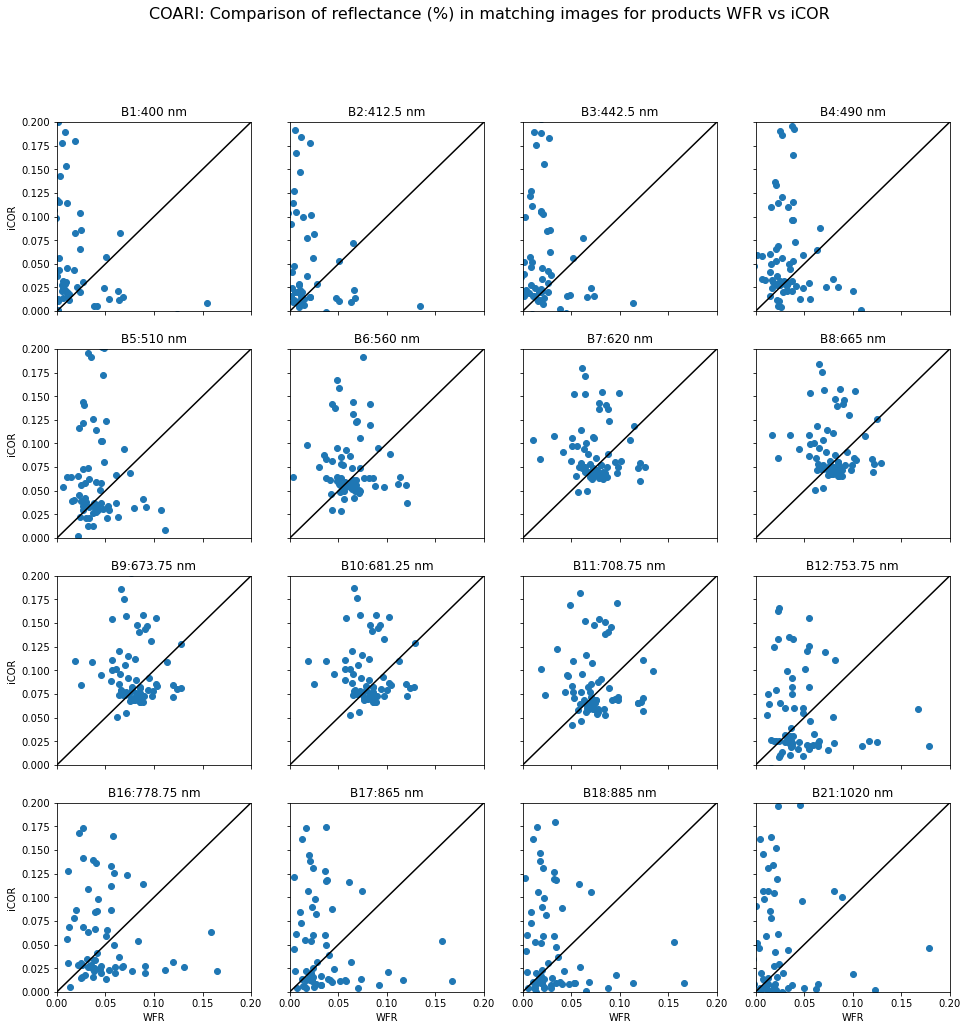

In [32]:
plt.rcParams['figure.figsize'] = [16, 16]
mass_scatter_s3(df_coari_wfr_m2, df_coari_icor_m2, title='COARI: Comparison of reflectance (%) in matching images for products WFR vs iCOR', save_file='D:\\processing\\win\\a1_plots\\coari_bands_skt.png')
plt.show()

<Figure size 1152x1152 with 0 Axes>

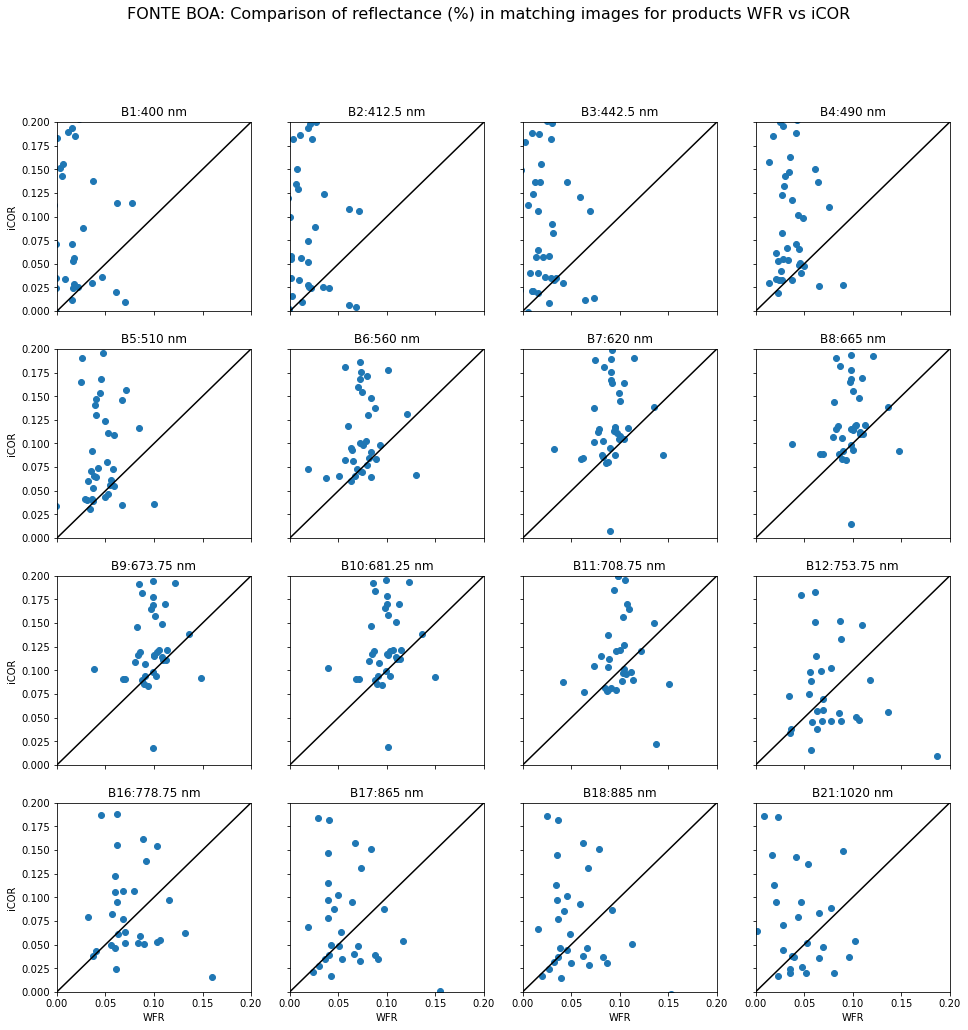

In [31]:
plt.clf()
plt.rcParams['figure.figsize'] = [16, 16]
mass_scatter_s3(df_fonte_boa_wfr_m2, df_fonte_boa_icor_m2, title='FONTE BOA: Comparison of reflectance (%) in matching images for products WFR vs iCOR', save_file='D:\\processing\\win\\a1_plots\\fonte_boa_bands_skt.png')
plt.show()

<Figure size 1152x1152 with 0 Axes>

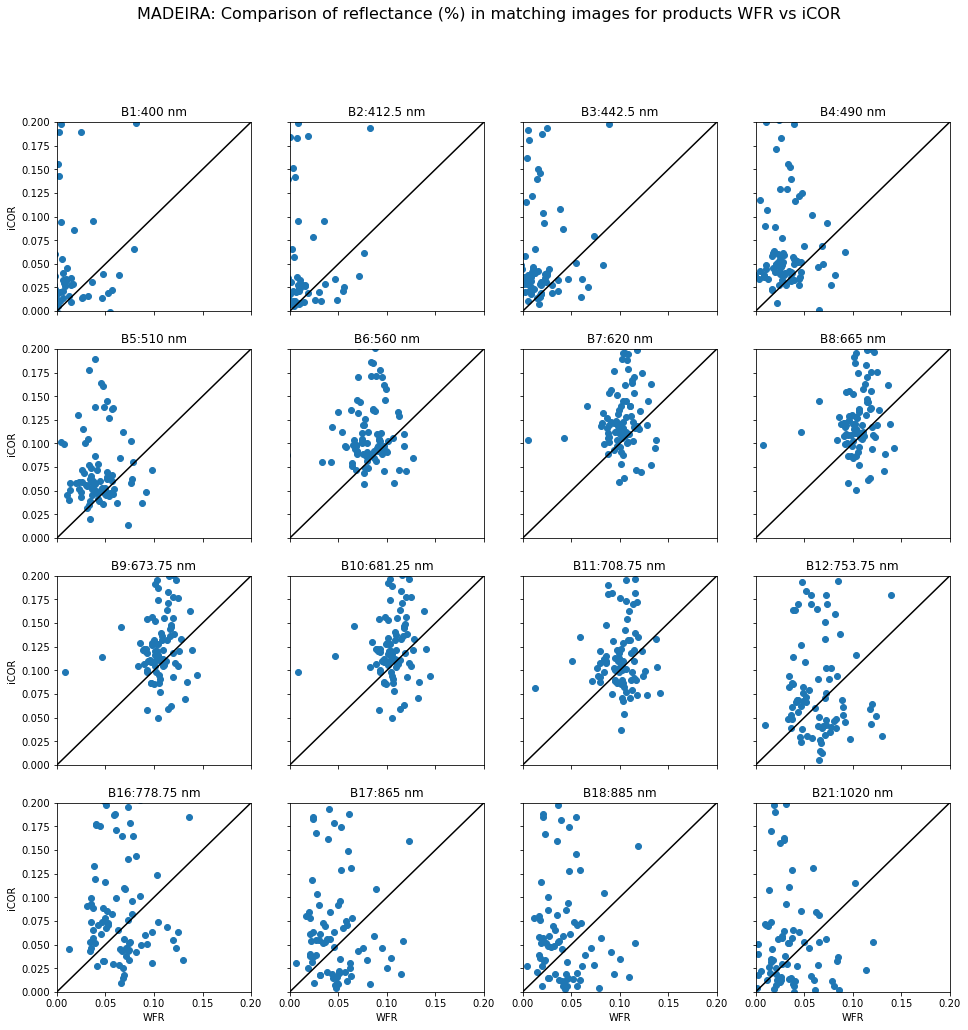

In [33]:
plt.clf()
plt.rcParams['figure.figsize'] = [16, 16]
mass_scatter_s3(df_madeira_wfr_m2, df_madeira_icor_m2, title='MADEIRA: Comparison of reflectance (%) in matching images for products WFR vs iCOR', save_file='D:\\processing\\win\\a1_plots\\madeira_bands_skt.png')
plt.show()

<Figure size 1152x1152 with 0 Axes>

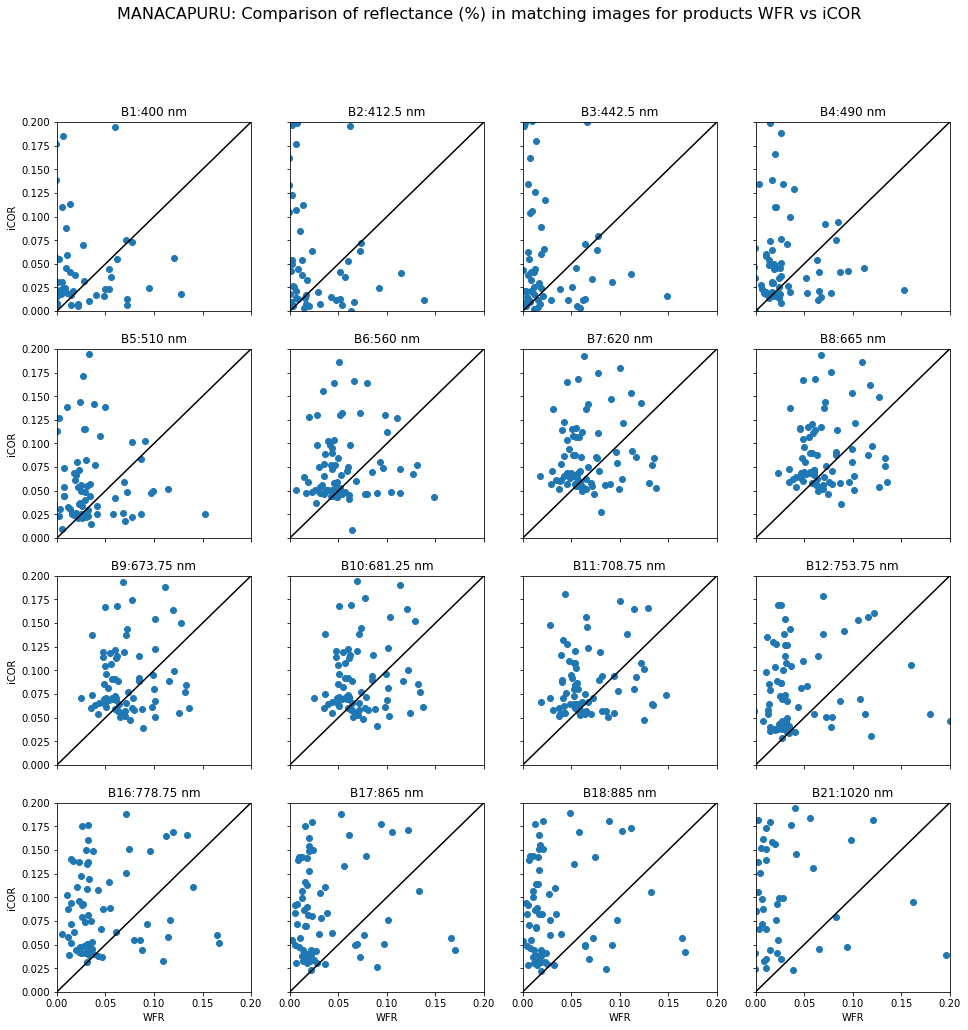

In [34]:
plt.clf()
plt.rcParams['figure.figsize'] = [16, 16]
mass_scatter_s3(df_manaca_wfr_m2, df_manaca_icor_m2, title='MANACAPURU: Comparison of reflectance (%) in matching images for products WFR vs iCOR', save_file='D:\\processing\\win\\a1_plots\\manacapuru_bands_skt.png')
plt.show()

<Figure size 1152x1152 with 0 Axes>

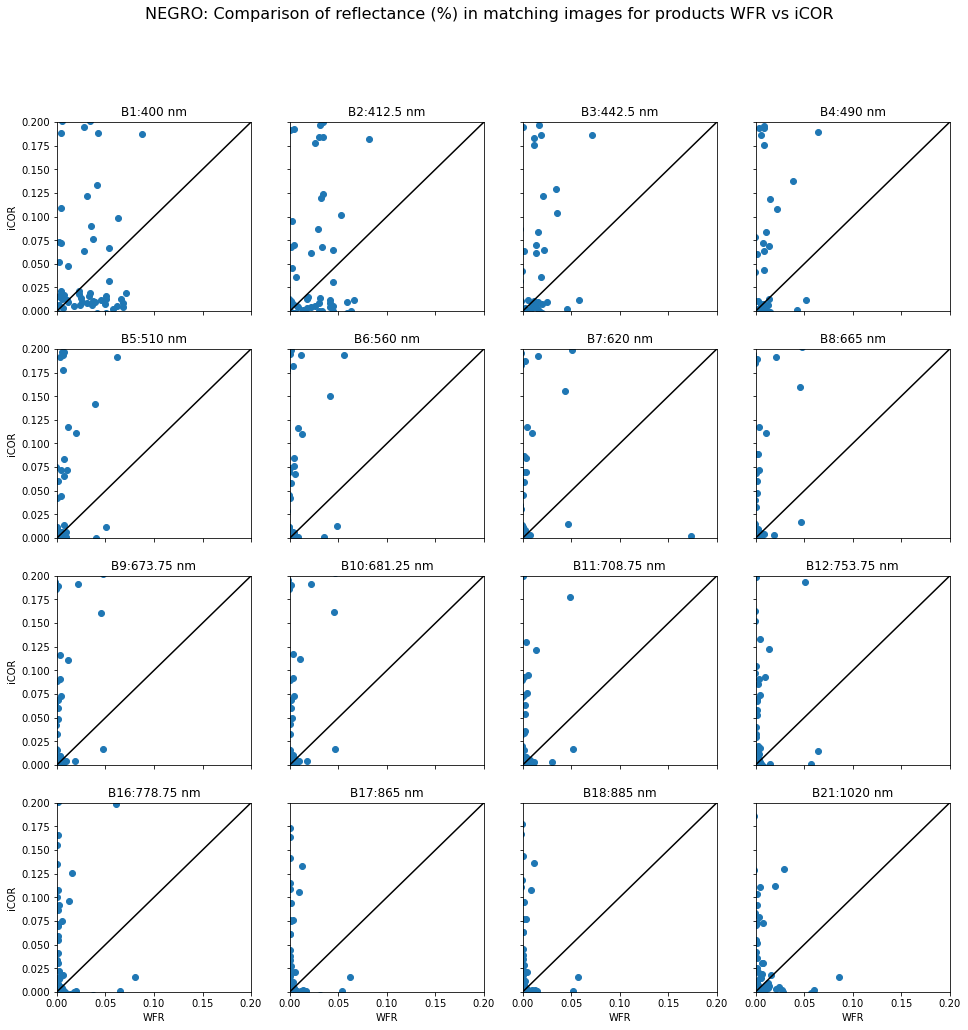

In [35]:
plt.clf()
plt.rcParams['figure.figsize'] = [16, 16]
mass_scatter_s3(df_negro_wfr_m2, df_negro_icor_m2, title='NEGRO: Comparison of reflectance (%) in matching images for products WFR vs iCOR', save_file='D:\\processing\\win\\a1_plots\\negro_bands_skt.png')
plt.show()

<Figure size 1152x1152 with 0 Axes>

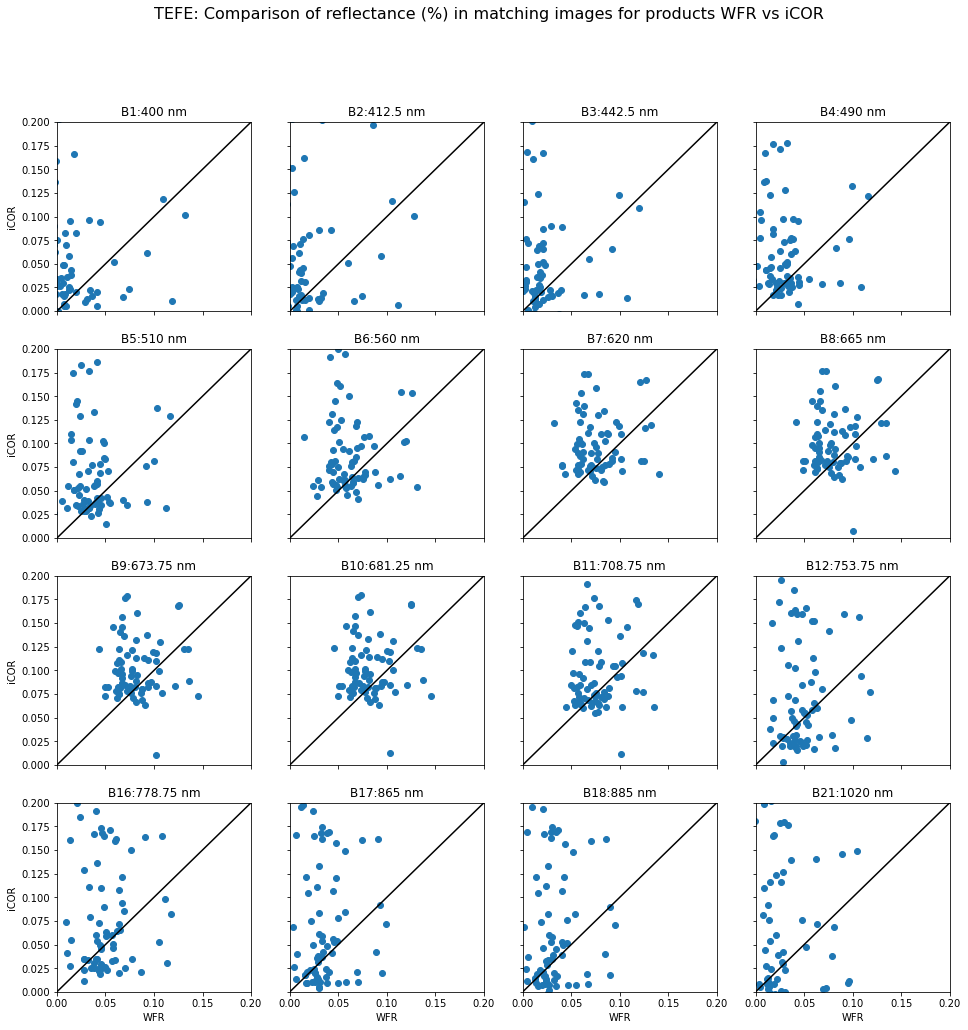

In [36]:
plt.clf()
plt.rcParams['figure.figsize'] = [16, 16]
mass_scatter_s3(df_tefe_wfr_m2, df_tefe_icor_m2, title='TEFE: Comparison of reflectance (%) in matching images for products WFR vs iCOR', save_file='D:\\processing\\win\\a1_plots\\tefe_bands_skt.png')
plt.show()